In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/housedata/output.csv')
df.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


I wanted to look at how the number of bedrooms per household would influence the pricing per house so I decided to focus on those two variables, Price and Bedrooms.

In [124]:
df.shape

(4600, 18)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [126]:
df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'street', 'statezip'], axis=1, inplace=True)

dropping unnecessary columns 

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4600 non-null   float64
 1   bedrooms      4600 non-null   float64
 2   bathrooms     4600 non-null   float64
 3   sqft_living   4600 non-null   int64  
 4   sqft_lot      4600 non-null   int64  
 5   floors        4600 non-null   float64
 6   waterfront    4600 non-null   int64  
 7   condition     4600 non-null   int64  
 8   yr_built      4600 non-null   int64  
 9   yr_renovated  4600 non-null   int64  
 10  city          4600 non-null   object 
 11  country       4600 non-null   object 
dtypes: float64(4), int64(6), object(2)
memory usage: 431.4+ KB


In [128]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,3.451739,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.677230,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,5.000000,2014.000000,2014.000000


In [129]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1955,2005,Shoreline,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,5,1921,0,Seattle,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1966,0,Kent,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1963,0,Bellevue,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1976,1992,Redmond,USA


<Axes: xlabel='price', ylabel='bedrooms'>

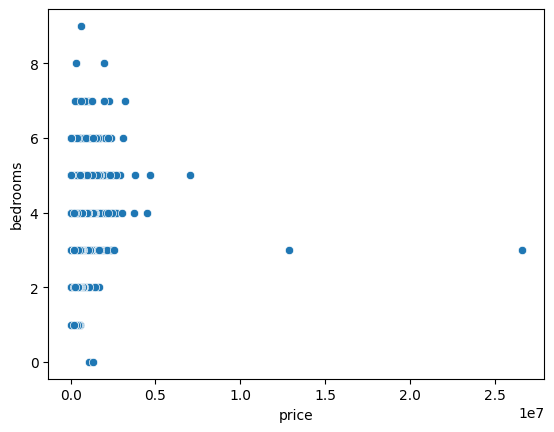

In [130]:
sns.scatterplot(data=df, x='price', y='bedrooms')

# plotting a scatter plot to look at the distribution of prices per bedrooms  

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >]],
      dtype=object)

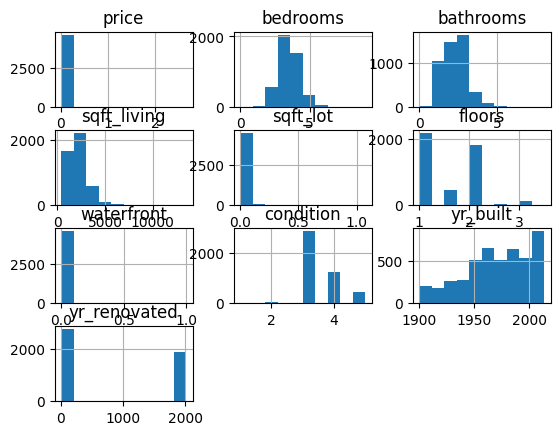

In [131]:
df.hist()

# visualizing the data 

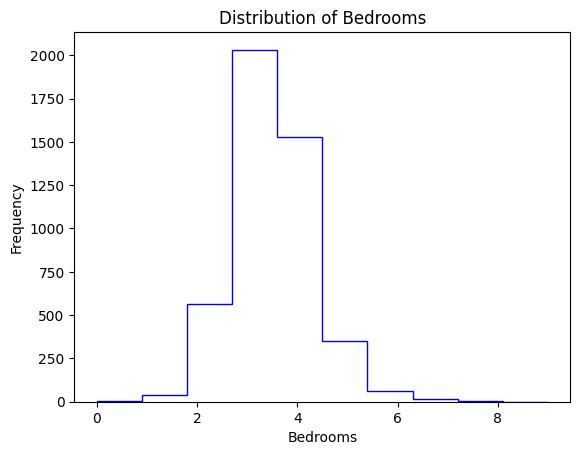

In [132]:
plt.hist(df['bedrooms'], color='b', histtype='step')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')
plt.show()

# we see the bulk of data in this table consists of houses with 3 or 4 bedrooms.
# one can argue there is more of a market for multi bedroom family houses

<Axes: >

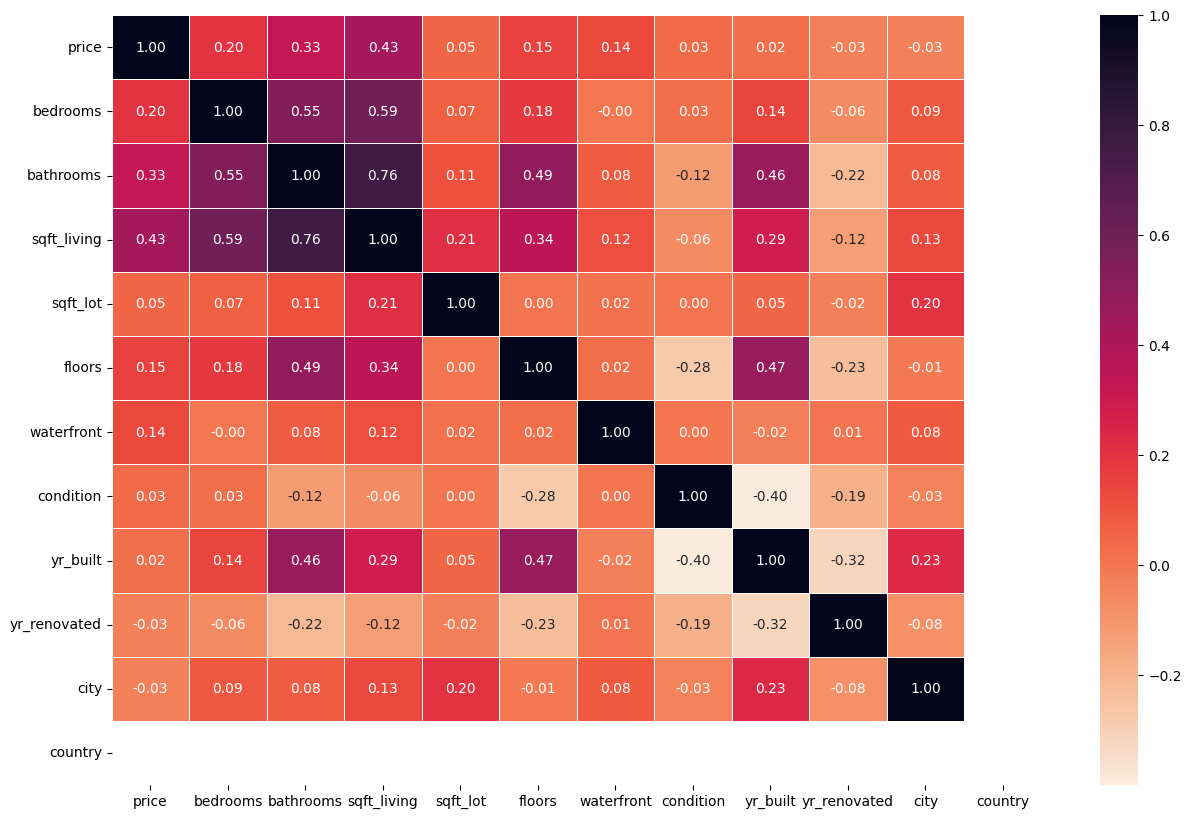

In [133]:
# running a correlation plot to see if there is any correlation between pricing and number
# of bedrooms

df['city']= pd.factorize(df['city'])[0]
df['country']= pd.factorize(df['country'])[0]

correl = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correl, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

# interesting. We see there is more of a correlation between price and sqft_living as opposed to
# price and bedrooms. Perhaps a bigger living room space is much more desired or valued in 
# comparisson to more bedrooms

<Axes: xlabel='price', ylabel='sqft_living'>

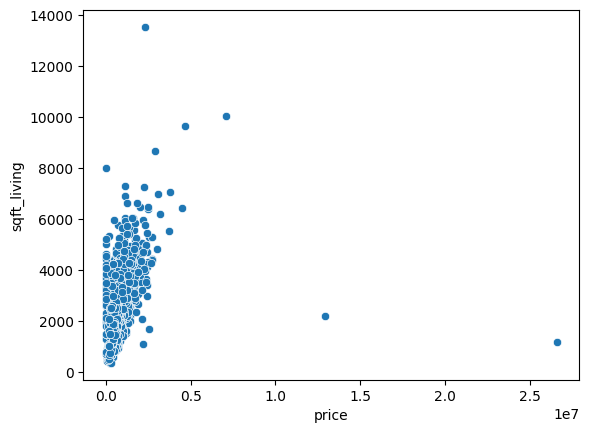

In [134]:
sns.scatterplot(data=df, x='price', y='sqft_living')

# scatter plot to see the distrubition of how price per sqft_living 
# the few outliers are definitely interesting to see, perhaps faulty data?

In [135]:
df.isna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False


Building a Model

In [136]:
b = (df.columns)

In [137]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df,columns=b)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,-0.423864,-0.441122,-0.843204,-0.829759,-0.193434,-0.022416,-0.085004,-0.667112,-0.531014,1.221670,-0.932857,0.0
1,3.249598,1.759705,0.432802,1.568858,-0.161718,0.906555,-0.085004,2.286416,-1.674693,-0.825693,-0.823706,0.0
2,-0.372424,-0.441122,-0.205201,-0.217125,-0.080978,-0.951388,-0.085004,0.809652,-0.161000,-0.825693,-0.714556,0.0
3,-0.234071,-0.441122,0.113800,-0.144440,-0.190145,-0.951388,-0.085004,0.809652,-0.261913,-0.825693,-0.605405,0.0
4,-0.003482,0.659291,0.432802,-0.206741,-0.121306,-0.951388,-0.085004,0.809652,0.175376,1.208396,-0.496255,0.0


In [138]:
X =  df.drop('price',axis=1)
y = df['price']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [141]:
r2_score(y_test, y_pred)

0.03403122819101645

In [142]:
model.score(X_train, y_train)

0.5424257592505324

In [143]:
mean_squared_error(y_pred,y_test)

3.0994786296445156

In [144]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [145]:
poly_lin = LinearRegression(fit_intercept=True)
poly_lin.fit(X_train_poly, y_train)
y_new = poly_lin.predict(X_test_poly)

In [146]:
r2_score(y_test, y_new)

0.04073080935180229

In [147]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
mean_squared_error(y_pred,y_test)

3.0994786296445156

In [149]:
print("mse : ",mean_squared_error(y_test,y_pred))
print("mae : ",mean_absolute_error(y_test,y_pred))
print("test r2score : ",r2_score(y_test,y_pred))

mse :  3.0994786296445156
mae :  0.3726951202707087
test r2score :  0.03403122819101645
